# OBJECTIVE
- The purpose of this script is to analyze and find insights about the EMR Sightings dataset.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from datetime import datetime
#from sklearn.model_selection import train_test_split
import sklearn as sl
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",200)
emr_data=pd.read_csv('C:/Users/oscarahe/OneDrive - Intel Corporation/Desktop/Exceles/EMR sightings dataset.csv')
emr_data


,id,rev,updated_date,system_updated_date,subject,tenant,submitted_date,locked_date,closed_date,eta,eta_request,sighting.open_date,sighting.root_caused_date,sighting.days_debugging,sighting.days_validating,sighting.days_debug_level1,sighting.days_debug_level2,sighting.forum_level_min,sighting.days_waiting,sighting.days_to_root_caused,parent_id,from_id,native,link_type,lineage,submitted_by,updated_by,owner,from_tenant,closed_by,sync_action,nickname,priority,relationship,relationship_action,context,release,classification,component,reason,sla_response_met,sla_resolution_met,family,send_mail,kinship,link_direction,from_subject,from_release,clone_status,status,domain,sighting.conclusion,sighting.env_found,sighting.fix_status,sighting.forum,sighting.status_mode,sighting.team_found,sighting.merge_id,sighting.forum_level,sighting.errata_status,sighting.fix_category,sighting.fix_category_2,sighting.fix_type,sighting.fix_status_2,sighting.fix_type_2,sighting.fix_lifetime_2,sighting.errata_info_owner,title,reason_other,status_reason,notify,tag,tenant_affected,hierarchy_path,permission_id_list,release_affected,subsystem,component_affected,sets,sighting.test_found,sighting.forum_visited,sighting_central.sighting.beat_owner,sighting_central.sighting.co_owners,sighting_central.sighting.date_open_new,sighting_central.sighting.days_open,sighting.days_open_aaron,sighting_central.sighting.debug_tools,sighting_central.sighting.hide_static_lu,sighting_central.sighting.root_cause_description,sighting_central.sighting.customer,sighting_central.sighting.date_rootcause_validate,sighting_central.sighting.failing_info,sighting_central.sighting.is_forum_lead,sighting_central.sighting.system_board,sighting_central.sighting.beat_status,sighting_central.sighting.customer_affected,sighting_central.sighting.os,sighting_central.sighting.sub_forum,sighting_central.sighting.date_assigned,sighting_central.sighting.days_new,sighting_central.sighting.days_lastupdate,sighting_central.sighting.beat_escape_reason,sighting_central.sighting.beat_required,sighting_central.sighting.gate_tag,sighting_central.sighting.platform_info,sighting_central.sighting.days_clone,sighting_central.sighting.total_days_new,sighting_central.sighting.beat_classification,sighting_central.sighting.beat_common_test_plan,sighting_central.sighting.beat_when_expected,sighting_central.sighting.beat_who_should_have_found,sighting_central.sighting.beat_detection_complexity,sighting_central.sighting.date_awaiting_review,sampletime,ww,ww_updated_date,ww_system_updated_date,ww_submitted_date,ww_closed_date,ww_eta,ww_eta_request,sighting.ww_open_date,sighting.ww_root_caused_date,sighting.ww_closed_aaron,sighting_central.sighting.ww_date_open_new,sighting_central.sighting.ww_date_rootcause_validate,sighting_central.sighting.ww_date_assigned,sighting_central.sighting.ww_date_awaiting_review,sighting_central.sighting.sysdbg_notes1,sighting_central.sighting.sysdbg_agenda,sighting_central.sighting.attention_needed,sighting_central.sighting.attention_reason,sighting_central.sighting.defect_history,sighting_central.sighting.defect_area,sighting_central.sighting.defect_source,sighting_central.sighting.sysdbg_tag1,sighting_central.sighting.bug_id,sighting_central.sighting.co_owner,sighting_central.sighting.from_component,sighting_central.sighting.supplying_ips,sighting_central.sighting.is_beat_approver,sighting_central.sighting.defect_die,family_affected,sighting_central.sighting.level_reason,sighting_central.sighting.level,sighting_central.sighting.vendor,sighting_central.sighting.port_configs,sighting_central.sighting.serial_io_interface,local_updated_date,sighting_central.sighting.customer_visible,sighting_central.sighting.impact,collaborators,sighting_central.sighting.beat_escape_reason_details,ww_local_updated_date
0,14018151333,23,19/12/2022 03:10,22/04/2024 21:28,sighting,sighting_central,6/12/2022 9:04,NaN,19/12/2022 03:09,NaN,NaN,6/12/2022 9:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1208771615,NaN,NaN,101553809

##  1. CLEANNING PROCESS/EXPLORATORY ANALYSIS


In [45]:
emr_data.columns

Index(['id', 'rev', 'updated_date', 'system_updated_date', 'subject', 'tenant',
       'submitted_date', 'locked_date', 'closed_date', 'eta',
       ...
       'sighting_central.sighting.level', 'sighting_central.sighting.vendor',
       'sighting_central.sighting.port_configs',
       'sighting_central.sighting.serial_io_interface', 'local_updated_date',
       'sighting_central.sighting.customer_visible',
       'sighting_central.sighting.impact', 'collaborators',
       'sighting_central.sighting.beat_escape_reason_details',
       'ww_local_updated_date'],
      dtype='object', length=154)

In [46]:
emr_data[['sighting_central.sighting.root_cause_description']]

,sighting_central.sighting.root_cause_description
0,Problem resolved after re-flashing the MAIN FP...
1,NaN
2,NaN
3,NaN
4,NaN
...,...
367,NaN
368,PI5 instance number difference between SPR and...
369,See extensive remarks from Carlos Ramirez More...
370,NaN


In [2]:
emr_data.isnull().sum()

id                                                        0
rev                                                       0
updated_date                                              0
system_updated_date                                       0
subject                                                   0
                                                       ... 
sighting_central.sighting.customer_visible              371
sighting_central.sighting.impact                        371
collaborators                                             0
sighting_central.sighting.beat_escape_reason_details    360
ww_local_updated_date                                     0
Length: 154, dtype: int64

In [5]:
emr_data1= emr_data[["id","updated_date","component","family","release","priority","title","status_reason","submitted_date","closed_date","owner","sighting.conclusion","sighting.team_found",'sighting_central.sighting.root_cause_description']]
emr_data1

,id,updated_date,component,family,release,priority,title,status_reason,submitted_date,closed_date,owner,sighting.conclusion,sighting.team_found,sighting_central.sighting.root_cause_description
0,14018151333,19/12/2022 03:10,hw.power,Emerald Rapids-SP-XNC Die,emrsp-xcc-a0,2-high,[EMR] EMR system Throttles due to External pr...,rejected.not_a_defect,6/12/2022 9:04,19/12/2022 03:09,adabney,hw.bug,ptp,Problem resolved after re-flashing the MAIN FP...
1,14018509356,25/01/2023 00:47,NaN,Emerald Rapids-SP-XNC Die,emrsp-xcc-a0,3-medium,[EMR-CXL1.1][CXL][2S] BIOS needs to change Mod...,rejected.filed_by_mistake,24/01/2023 17:26,25/01/2023 00:47,aebenavi,no_root_cause.rejected,arch,NaN
2,14019055430,6/4/2023 20:39,hw.upi,Emerald Rapids-SP-XNC Die,emrsp-xcc-a0,4-low,[XPV AVE] [EMR XCC A0] [UPI GEN5 SIV] Rx JTOL ...,rejected.not_a_defect,29/03/2023 23:37,6/4/2023 20:38,ahinojos,not_a_bug,ev,NaN
3,14019247088,26/05/2023 15:27,hw.upi,Emerald Rapids-SP-XNC Die,emrsp-xcc-a0,4-low,[XPV AVE] [EMR XCC A0] [UPI GEN5 SIV] Rx JTOL ...,rejected.not_a_defect,27/04/2023 16:40,26/05/2023 15:27,ahinojos,not_a_bug,ev,NaN
4,15013435531,12/5/2023 9:47,hw.fuse,Emerald Rapids-SP-XNC Die,emrsp-xcc-a0,2-high,[EMR XCC ES2]Request sighting report for track...,rejected.merged,12/5/2023 9:09,12/5/2023 9:47,achu,no_root_cause.rejected,customer_support,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,15014600103,13/11/2023 22:07,hw.fuse,Emerald Rapids-SP-MCC Die,emrsp-mcc-r1,3-medium,[Lenovo-TDC\Seoul] Wrong PIROM contents on off...,complete.wont_validate,1/11/2023 3:42,13/11/2023 22:07,wuweber,bios.bug,customer_support,NaN
368,15014729895,19/03/2024 09:36,fw.oobmsm,Emerald Rapids-SP-XNC Die,emrsp-xcc-a1,2-high,[Bytedance][Yichun][Nettrix] NVMe PCIe speed d...,root_caused.awaiting_fix,22/11/2023 02:58,NaN,wenweita,fw.bug,customer_support,PI5 instance number difference between SPR and...
369,16022750062,26/12/2023 15:12,fw.pcode,Emerald Rapids-SP-XNC Die,emrsp-xcc-a1,3-medium,[EMR A1][2S][PMSS][SST]: CLOS 0 and CLOS 1 sub...,rejected.not_a_defect,6/12/2023 20:49,26/12/2023 15:05,thangama,not_a_bug,bu_platform,See extensive remarks from Carlos Ramirez More...
370,15014843377,7/1/2024 21:11,hw.big_core,Emerald Rapids-SP-XNC Die,emrsp-xcc-a1,2-high,[TriRiver V2][EMR]CPU has thermal hot when run...,rejected.not_a_defect,7/12/2023 8:53,7/1/2024 21:11,wtian4,not_a_bug,customer_support,NaN


In [53]:
emr_data1.dtypes

id                                                   int64
updated_date                                        object
component                                           object
family                                              object
release                                             object
priority                                            object
title                                               object
status_reason                                       object
submitted_date                                      object
closed_date                                         object
owner                                               object
sighting.conclusion                                 object
sighting.team_found                                 object
sighting_central.sighting.root_cause_description    object
dtype: object

In [62]:
emr_data1.isnull().sum()

id                                                    0
updated_date                                          0
component                                            28
family                                                0
release                                               0
priority                                              0
title                                                 0
status_reason                                         0
submitted_date                                        0
closed_date                                          19
owner                                                 0
sighting.conclusion                                   2
sighting.team_found                                   0
sighting_central.sighting.root_cause_description    204
dtype: int64

In [2]:
emr_data['subject'].value_counts()

subject
sighting    372
Name: count, dtype: int64

In [52]:
emr_data['sighting_central.sighting.root_cause_description'].value_counts()

sighting_central.sighting.root_cause_description
Resolved by EMR LTM patch 0x3 (second version)                                                                                                                                                      3
Hynix bug, more details on the hynix com                                                                                                                                                            3
Apparently lost the SMM considerations in the EDS some time after SKX                                                                                                                               3
unexpected Power Virus Protector parameter change                                                                                                                                                   2
Bug was resolved when multiple approaches to reducing IOSF-SB loading were combined in a single patch.  Not much of an RCA.                                    

In [35]:
emr_data['status_reason'].value_counts()

status_reason
rejected.not_a_defect        117
complete.validated           117
rejected.merged               34
rejected.wont_do              27
complete.wont_validate        20
complete                      17
rejected.filed_by_mistake     14
root_caused.pursuing_fix      10
rejected.cannot_reproduce      7
root_caused.awaiting_fix       7
open.clone                     2
Name: count, dtype: int64

In [4]:
emr_data1['owner'].value_counts().head(50)

owner
nljimene    13
ombecerr    11
csong20      9
coramire     9
bachavez     7
juanman1     7
jalonsoj     6
cadoming     6
bcalhoon     6
hmpicosm     5
sbarrios     5
srotich      5
prmarque     5
jgodoyde     5
jochoa       5
jsfernan     4
chinnai      4
gfuentes     4
jjabudtr     4
arnavarr     4
jaimeihe     4
jkalina      4
gomeseva     3
juanasol     3
lmalagon     3
joseitz      3
ipaezcas     3
eballest     3
jrdelsor     3
dfloress     3
ogalvezr     3
hkenya       3
cprivera     3
thangama     3
ovazquez     3
spullell     3
spashya      3
umeraban     2
jmachina     2
iherrer      2
taylorjo     2
jjbautis     2
gsotoram     2
vchalla      2
tolasupo     2
skaliraj     2
jorgecor     2
leiren       2
ivangele     2
kumarc       2
Name: count, dtype: int64

In [6]:
#### CLEANING FUNCTION

def tweak_hw(emr_data1):
    return (emr_data1
            
            .assign(status_reason=lambda df_: df_.status_reason.str.replace(".", "_"))
            .assign(release=lambda df_: df_.release.str.replace("-", "_"))
            .assign(priority=lambda df_: df_.priority.replace(
                {"1-showstopper": "showstopper", "2-high": "high", "3-medium": "medium", "4-low": "low"}
            )) 
            .assign(priority_num=lambda df_: df_.priority.map({
                "showstopper": 1, "high": 2, "medium": 3, "low": 4
            }))
            .assign(closed_date=lambda df_: pd.to_datetime(df_.closed_date, errors='coerce',dayfirst=True))
            .assign(closed_date=lambda df_: df_.closed_date.fillna(pd.Timestamp(datetime.today())))
            .assign(submitted_date=lambda df_: pd.to_datetime(df_.submitted_date, errors='coerce',dayfirst=True))
            .assign(submitted_year=lambda df_: df_.submitted_date.dt.year)
            .assign(days_between=lambda df_: (df_.closed_date - df_.submitted_date).dt.days)
            .assign(component=lambda df_: df_.component.fillna("NA"))
            .assign(submitted_year=lambda df_: df_.submitted_year.astype('int64'))
            .assign(days_between=lambda df_: df_.days_between.astype('int64'))
            .assign(sighting_central_root=lambda df_: df_['sighting_central.sighting.root_cause_description'].fillna("NA")).drop(columns=['sighting_central.sighting.root_cause_description'])
            )
           


In [7]:
emr_data1=tweak_hw(emr_data1)
emr_data1

,id,updated_date,component,family,release,priority,title,status_reason,submitted_date,closed_date,owner,sighting.conclusion,sighting.team_found,priority_num,submitted_year,days_between,sighting_central_root
0,14018151333,19/12/2022 03:10,hw.power,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR] EMR system Throttles due to External pr...,rejected_not_a_defect,2022-12-06 09:04:00,2022-12-19 03:09:00.000000,adabney,hw.bug,ptp,2,2022,12,Problem resolved after re-flashing the MAIN FP...
1,14018509356,25/01/2023 00:47,NA,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR-CXL1.1][CXL][2S] BIOS needs to change Mod...,rejected_filed_by_mistake,2023-01-24 17:26:00,2023-01-25 00:47:00.000000,aebenavi,no_root_cause.rejected,arch,3,2023,0,NA
2,14019055430,6/4/2023 20:39,hw.upi,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,low,[XPV AVE] [EMR XCC A0] [UPI GEN5 SIV] Rx JTOL ...,rejected_not_a_defect,2023-03-29 23:37:00,2023-04-06 20:38:00.000000,ahinojos,not_a_bug,ev,4,2023,7,NA
3,14019247088,26/05/2023 15:27,hw.upi,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,low,[XPV AVE] [EMR XCC A0] [UPI GEN5 SIV] Rx JTOL ...,rejected_not_a_defect,2023-04-27 16:40:00,2023-05-26 15:27:00.000000,ahinojos,not_a_bug,ev,4,2023,28,NA
4,15013435531,12/5/2023 9:47,hw.fuse,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR XCC ES2]Request sighting report for track...,rejected_merged,2023-05-12 09:09:00,2023-05-12 09:47:00.000000,achu,no_root_cause.rejected,customer_support,2,2023,0,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,15014600103,13/11/2023 22:07,hw.fuse,Emerald Rapids-SP-MCC Die,emrsp_mcc_r1,medium,[Lenovo-TDC\Seoul] Wrong PIROM contents on off...,complete_wont_validate,2023-11-01 03:42:00,2023-11-13 22:07:00.000000,wuweber,bios.bug,customer_support,3,2023,12,NA
368,15014729895,19/03/2024 09:36,fw.oobmsm,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,high,[Bytedance][Yichun][Nettrix] NVMe PCIe speed d...,root_caused_awaiting_fix,2023-11-22 02:58:00,2024-11-21 15:35:30.017364,wenweita,fw.bug,customer_support,2,2023,365,PI5 instance number difference between SPR and...
369,16022750062,26/12/2023 15:12,fw.pcode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[EMR A1][2S][PMSS][SST]: CLOS 0 and CLOS 1 sub...,rejected_not_a_defect,2023-12-06 20:49:00,2023-12-26 15:05:00.000000,thangama,not_a_bug,bu_platform,3,2023,19,See extensive remarks from Carlos Ramirez More...
370,15014843377,7/1/2024 21:11,hw.big_core,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,high,[TriRiver V2][EMR]CPU has thermal hot when run...,rejected_not_a_defect,2023-12-07 08:53:00,2024-01-07 21:11:00.000000,wtian4,not_a_bug,customer_support,2,2023,31,NA


In [54]:
#emr_data1= emr_data1.fillna("NA")

In [102]:
emr_data1.dtypes

id                                int64
updated_date                     object
component                        object
family                           object
release                          object
priority                         object
title                            object
status_reason                    object
submitted_date           datetime64[ns]
closed_date              datetime64[ns]
owner                            object
sighting.conclusion              object
sighting.team_found              object
priority_num                      int64
submitted_year                    int64
days_between                      int64
sighting_central_root            object
dtype: object

In [103]:
emr_data1.isnull().sum()

id                       0
updated_date             0
component                0
family                   0
release                  0
priority                 0
title                    0
status_reason            0
submitted_date           0
closed_date              0
owner                    0
sighting.conclusion      2
sighting.team_found      0
priority_num             0
submitted_year           0
days_between             0
sighting_central_root    0
dtype: int64

In [6]:
emr_data1.sort_values("submitted_year")

,id,updated_date,component,family,release,priority,title,status_reason,submitted_date,closed_date,owner,sighting.conclusion,sighting.team_found,priority_num,submitted_year,days_between
0,14018151333,19/12/2022 03:10,hw.power,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR] EMR system Throttles due to External pr...,rejected_not_a_defect,2022-12-06 09:04:00,2022-12-19 03:09:00.000000,adabney,hw.bug,ptp,2,2022,12
126,14017859773,10/10/2023 21:51,hw.dmi,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR XCC A0 PO][PC6] DMI not reporting idle an...,complete_validated,2022-10-29 00:41:00,2023-10-10 21:50:00.000000,hmpicosm,hw.bug,sv.enabling,3,2022,346
125,14017840950,13/05/2023 21:02,bios.mrc,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR A0 PO][EMR DDR EV] Lane dropping/ low mar...,complete_validated,2022-10-27 04:23:00,2023-01-05 17:39:00.000000,hkenya,hw.bug,ev,3,2022,70
124,14017766920,24/11/2022 15:06,val.env.configuration,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,showstopper,EMR PPO UPS dynamic string for FIVR DDR cause ...,complete_validated,2022-10-17 22:48:00,2022-11-24 15:06:00.000000,jkalina,env.bug,sv.enabling,1,2022,37
123,14017766856,24/11/2022 15:04,val.env.configuration,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,showstopper,EMR PPO UPS dynamic string for SCFIO enables i...,complete_validated,2022-10-17 22:42:00,2022-11-24 15:04:00.000000,jkalina,env.bug,sv.enabling,1,2022,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,16023465464,13/05/2024 15:23,fw.acode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,high,[Cluster][FLEX EMR_XCC A1][Multiple] DISPATCHE...,root_caused_awaiting_fix,2024-03-04 11:41:00,2024-10-10 11:07:12.477414,appaji,fw.bug,bu_platform,2,2024,219
81,15015524089,24/06/2024 18:40,fw.acode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,showstopper,[ByteDance][EMR][Yichun][Nettrix] Report CPU0 ...,root_caused_awaiting_fix,2024-02-27 01:29:00,2024-10-10 11:07:12.477414,cma16,hw.bug,customer_support,1,2024,226
80,22019353310,5/3/2024 17:54,hw.perf,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,EMR with Cassandra workload and Zstd compressi...,rejected_cannot_reproduce,2024-01-17 17:44:00,2024-03-05 17:54:00.000000,bravindr,no_root_cause.rejected,bu_platform,3,2024,48
345,15015657452,24/07/2024 21:55,NA,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[EMR A0 ][XCC][2S][RAS] [Archer City] Unexpect...,rejected_not_a_defect,2024-03-18 04:25:00,2024-07-24 21:55:00.000000,staj,not_a_bug,bu_platform,3,2024,128


In [7]:
emr_data1['submitted_year'].value_counts()
emr_data1

,id,updated_date,component,family,release,priority,title,status_reason,submitted_date,closed_date,owner,sighting.conclusion,sighting.team_found,priority_num,submitted_year,days_between
0,14018151333,19/12/2022 03:10,hw.power,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR] EMR system Throttles due to External pr...,rejected_not_a_defect,2022-12-06 09:04:00,2022-12-19 03:09:00.000000,adabney,hw.bug,ptp,2,2022,12
1,14018509356,25/01/2023 00:47,NA,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR-CXL1.1][CXL][2S] BIOS needs to change Mod...,rejected_filed_by_mistake,2023-01-24 17:26:00,2023-01-25 00:47:00.000000,aebenavi,no_root_cause.rejected,arch,3,2023,0
2,14019055430,6/4/2023 20:39,hw.upi,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,low,[XPV AVE] [EMR XCC A0] [UPI GEN5 SIV] Rx JTOL ...,rejected_not_a_defect,2023-03-29 23:37:00,2023-04-06 20:38:00.000000,ahinojos,not_a_bug,ev,4,2023,7
3,14019247088,26/05/2023 15:27,hw.upi,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,low,[XPV AVE] [EMR XCC A0] [UPI GEN5 SIV] Rx JTOL ...,rejected_not_a_defect,2023-04-27 16:40:00,2023-05-26 15:27:00.000000,ahinojos,not_a_bug,ev,4,2023,28
4,15013435531,12/5/2023 9:47,hw.fuse,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR XCC ES2]Request sighting report for track...,rejected_merged,2023-05-12 09:09:00,2023-05-12 09:47:00.000000,achu,no_root_cause.rejected,customer_support,2,2023,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,15014600103,13/11/2023 22:07,hw.fuse,Emerald Rapids-SP-MCC Die,emrsp_mcc_r1,medium,[Lenovo-TDC\Seoul] Wrong PIROM contents on off...,complete_wont_validate,2023-11-01 03:42:00,2023-11-13 22:07:00.000000,wuweber,bios.bug,customer_support,3,2023,12
368,15014729895,19/03/2024 09:36,fw.oobmsm,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,high,[Bytedance][Yichun][Nettrix] NVMe PCIe speed d...,root_caused_awaiting_fix,2023-11-22 02:58:00,2024-10-10 11:07:12.477414,wenweita,fw.bug,customer_support,2,2023,323
369,16022750062,26/12/2023 15:12,fw.pcode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[EMR A1][2S][PMSS][SST]: CLOS 0 and CLOS 1 sub...,rejected_not_a_defect,2023-12-06 20:49:00,2023-12-26 15:05:00.000000,thangama,not_a_bug,bu_platform,3,2023,19
370,15014843377,7/1/2024 21:11,hw.big_core,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,high,[TriRiver V2][EMR]CPU has thermal hot when run...,rejected_not_a_defect,2023-12-07 08:53:00,2024-01-07 21:11:00.000000,wtian4,not_a_bug,customer_support,2,2023,31


In [5]:
#### HOW MANY MAX DAYS BY PRIORITY, ID, and STATUS REASON

#emr_data1[["priority","id","status_reason","days_between"]].groupby("priority").min()
emr_data1.sort_values("days_between",ascending=True).head(10)


,id,updated_date,component,family,release,priority,title,status_reason,submitted_date,closed_date,owner,sighting.conclusion,sighting.team_found,priority_num,submitted_year,days_between
334,14019049670,29/03/2023 15:44,fw.ltm,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR XCC][A0][RAS]: rdIAmsr using PECI returns...,rejected_filed_by_mistake,2023-03-29 15:32:00,2023-03-29 09:42:00,sbarrios,no_root_cause.rejected,sv,3,2023,-1
339,22017914017,13/04/2023 21:34,NA,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR]: Performance drop by 5% when acode_dram ...,rejected_filed_by_mistake,2023-04-13 17:00:00,2023-04-13 16:34:00,srotich,no_root_cause.rejected,ptp,2,2023,-1
223,16020022626,14/03/2023 14:55,fw.other,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR A0 VV][HSIO][2S][PCIe] MCE hit after rese...,rejected_not_a_defect,2023-03-13 12:14:00,2023-03-13 22:26:00,kumarc,not_a_bug,bu_platform,2,2023,0
173,15013780841,20/07/2023 13:29,NA,Emerald Rapids-SP-MCC Die,emrsp_mcc_r1,high,"EMR DSA DPDK dmadev_autotest failed with ""Data...",rejected_not_a_defect,2023-07-11 02:52:00,2023-07-11 22:39:00,gustavom,not_a_bug,customer_support,2,2023,0
315,14018467522,25/01/2023 01:05,hw.pma,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,showstopper,[EMR-XCC][A0 VIS][Incoming DPM][PM] Units with...,rejected_filed_by_mistake,2023-01-19 18:15:00,2023-01-19 19:45:00,scerdasr,no_root_cause.rejected,mfg.ppv,1,2023,0
66,15013778573,10/7/2023 14:16,NA,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[Cluster][EMR][XCC][A0][BKC13]MLC latency perf...,rejected_filed_by_mistake,2023-07-10 08:27:00,2023-07-10 14:13:00,bushengw,no_root_cause.rejected,bu_platform,3,2023,0
182,14020329138,12/9/2023 22:17,NA,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[EMR][TME] Booting halts when TME,rejected_not_a_defect,2023-09-12 18:28:00,2023-09-12 22:17:00,jmorales,not_a_bug,sv,3,2023,0
166,16020779913,23/05/2023 18:57,hw.upi,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR A0 VV][HSIO][2S][UPI][XCC]: Observing CPU...,rejected_not_a_defect,2023-05-23 06:07:00,2023-05-23 18:57:00,johnsonl,not_a_bug,bu_platform,2,2023,0
152,14018662693,11/2/2023 4:06,hw.punit,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR] OOBMSM timeout (700ms) requires BMC to r...,rejected_wont_do,2023-02-11 03:58:00,2023-02-11 04:01:00,jcgindle,no_root_cause.rejected,customer_support,3,2023,0
73,22018704545,10/8/2023 19:36,hw.fuse,Emerald Rapids-SP-MCC Die,emrsp_mcc_r1,medium,[EMR][MCC][R1][SST-TF] virtual.pcode_runtime_f...,rejected_filed_by_mistake,2023-08-10 18:38:00,2023-08-10 19:36:00,coramire,no_root_cause.rejected,sv,3,2023,0


In [6]:

emr_data1.sort_values("days_between",ascending=False).head(10)

,id,updated_date,component,family,release,priority,title,status_reason,submitted_date,closed_date,owner,sighting.conclusion,sighting.team_found,priority_num,submitted_year,days_between
171,14019660995,13/02/2024 14:39,hw.cxl,Emerald Rapids-SP-MCC Die,emrsp_mcc_r0,medium,[EMR][CXL][MCC]Post moka shows MCA_IAL_TX_RUN_...,root_caused_awaiting_fix,2023-06-16 18:06:00,2024-10-31 10:22:41.334856,jclopezg,hw.bug,sv,3,2023,502
306,14019800162,4/3/2024 22:09,hw.cxl,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[EMR][A1][CXL] reserved bits are set in H2D da...,root_caused_pursuing_fix,2023-07-06 23:46:00,2024-10-31 10:22:41.334856,prmarque,env.bug,sv,3,2023,482
183,14020397220,6/3/2024 16:50,hw.big_core,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[Cluster][MCC-XCC R1-A1] MCA_DISPATCHER_RUN_B...,root_caused_awaiting_fix,2023-09-20 20:13:00,2024-10-31 10:22:41.334856,jochoa,fw.bug,sv.cluster,3,2023,406
310,14020733102,6/3/2024 16:51,fw.acode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[Cluster][XCC A1][MCA_WATCHDOG_TIMEOUT_BULK_CR...,root_caused_pursuing_fix,2023-10-31 02:42:00,2024-10-31 10:22:41.334856,rmiller,hw.arch,sv.cluster,3,2023,366
86,14017745683,10/10/2023 20:10,val.env.configuration,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR XCC] Prod POF enablement: S3M is not resp...,complete_validated,2022-10-13 21:50:00,2023-10-10 20:10:00.000000,dramosol,env.bug,sv.enabling,2,2022,361
77,14020784944,21/05/2024 23:37,hw.big_core,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[EMR][XCC][A1] EMR PPV - DRG Sanity MUC Failin...,root_caused_pursuing_fix,2023-11-06 16:50:00,2024-10-31 10:22:41.334856,bcalhoon,hw.tuning,mfg.ppv,3,2023,359
198,14017802202,10/10/2023 20:05,fw.pcode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR-PO][A0][RAS]: CHA mc_status & UBOX mc_mis...,complete_validated,2022-10-21 14:53:00,2023-10-10 20:04:00.000000,jrdelsor,fw.bug,sv.enabling,3,2022,354
88,14017804101,10/10/2023 23:00,fw.ucode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,low,EMR PO: Errata update - MSR for DDIO Mask won...,complete_wont_validate,2022-10-21 17:54:00,2023-10-10 23:00:00.000000,dvalgano,hw.bug,sv.execution,4,2022,354
126,14017859773,10/10/2023 21:51,hw.dmi,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR XCC A0 PO][PC6] DMI not reporting idle an...,complete_validated,2022-10-29 00:41:00,2023-10-10 21:50:00.000000,hmpicosm,hw.bug,sv.enabling,3,2022,346
368,15014729895,19/03/2024 09:36,fw.oobmsm,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,high,[Bytedance][Yichun][Nettrix] NVMe PCIe speed d...,root_caused_awaiting_fix,2023-11-22 02:58:00,2024-10-31 10:22:41.334856,wenweita,fw.bug,customer_support,2,2023,344


In [8]:
emr_data1['closed_date'] = emr_data1['closed_date'].astype(str)
notclosed=emr_data1[emr_data1['closed_date'].str.contains('2024-10-31')]

notclosed

,id,updated_date,component,family,release,priority,title,status_reason,submitted_date,closed_date,owner,sighting.conclusion,sighting.team_found,priority_num,submitted_year,days_between
77,14020784944,21/05/2024 23:37,hw.big_core,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[EMR][XCC][A1] EMR PPV - DRG Sanity MUC Failin...,root_caused_pursuing_fix,2023-11-06 16:50:00,2024-10-31 10:22:41.334856,bcalhoon,hw.tuning,mfg.ppv,3,2023,359
78,15014859759,3/2/2024 14:45,fw.other,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[Cluster][EMR][XCC][A1][BKC24] SPECCPU povray ...,root_caused_awaiting_fix,2023-12-11 01:22:00,2024-10-31 10:22:41.334856,bushengw,fw.bug,bu_platform,3,2023,325
81,15015524089,24/06/2024 18:40,fw.acode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,showstopper,[ByteDance][EMR][Yichun][Nettrix] Report CPU0 ...,root_caused_awaiting_fix,2024-02-27 01:29:00,2024-10-31 10:22:41.334856,cma16,hw.bug,customer_support,1,2024,247
82,16023465464,13/05/2024 15:23,fw.acode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,high,[Cluster][FLEX EMR_XCC A1][Multiple] DISPATCHE...,root_caused_awaiting_fix,2024-03-04 11:41:00,2024-10-31 10:22:41.334856,appaji,fw.bug,bu_platform,2,2024,240
120,14021867778,15/07/2024 17:51,fw.pcode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,high,Acode PMA registers are missing from crashlog ...,root_caused_pursuing_fix,2024-03-06 21:46:00,2024-10-31 10:22:41.334856,gilbert,fw.arch,fw.eval,2,2024,238
171,14019660995,13/02/2024 14:39,hw.cxl,Emerald Rapids-SP-MCC Die,emrsp_mcc_r0,medium,[EMR][CXL][MCC]Post moka shows MCA_IAL_TX_RUN_...,root_caused_awaiting_fix,2023-06-16 18:06:00,2024-10-31 10:22:41.334856,jclopezg,hw.bug,sv,3,2023,502
183,14020397220,6/3/2024 16:50,hw.big_core,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[Cluster][MCC-XCC R1-A1] MCA_DISPATCHER_RUN_B...,root_caused_awaiting_fix,2023-09-20 20:13:00,2024-10-31 10:22:41.334856,jochoa,fw.bug,sv.cluster,3,2023,406
187,15014854421,1/7/2024 6:22,hw.memory,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[EGS EMR][Archer City][A1][2S][RAS] Patrol scr...,open_clone,2023-12-08 17:58:00,2024-10-31 10:22:41.334856,jli61,NaN,bu_platform,3,2023,327
188,14021433475,29/07/2024 17:43,hw.memory,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR XCC MMX][mmx_32gb][A1] MemMatrix MRharass...,root_caused_pursuing_fix,2024-01-22 19:05:00,2024-10-31 10:22:41.334856,jgodoyde,fw.bug,sv,3,2024,282
189,14021450544,15/07/2024 17:51,hw.uncore,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[Cluster] [EMR A1] MCE PCU: Pkgc_Allow_L1_Erro...,root_caused_pursuing_fix,2024-01-24 01:40:00,2024-10-31 10:22:41.334856,jochoa,hw.arch,sv.cluster,3,2024,281


In [9]:
emr_data1[["component"]].value_counts()
#db=emr_data1["component"]=="NA"
#emr_data1.loc[db]

component            
hw.memory                62
NA                       28
bios.mrc                 25
hw.fuse                  24
hw.perf                  21
fw.acode                 21
fw.pcode                 17
hw.pcie5                 15
hw.cha                   12
fw.ucode                 12
val.env.tool             11
val.env.configuration    10
hw.cxl                   10
hw.big_core               9
bios                      9
hw.upi                    8
fw.ltm                    7
fw.other                  6
hw.mesh                   5
val.env.test              5
hw.ras                    4
fw.ucode.patch            4
hw.m2iosf                 4
hw.reset                  3
hw.punit                  3
fw.mcheck                 3
sw.application            2
hw.configrom              2
val.env.debug_tools       2
fw.cpm                    2
hw.pma                    2
hw.power                  2
hw.virtualization         1
val.env.content           1
hw.uncore                 

In [44]:
#### CLOSE_DATE2 IS DATETIME
#### SUBMITTED_DATE2 IS DATETIME
#### YEAR_SUBMITTED IS INT64
#### DAYS_BETWEEN IS INT64
#### PRIORITY_NUM IS INT64

emr_data1.dtypes

id                              int64
updated_date                   object
component                      object
family                         object
release                        object
priority                       object
title                          object
status_reason                  object
submitted_date         datetime64[ns]
closed_date            datetime64[ns]
owner                          object
sighting.conclusion            object
sighting.team_found            object
priority_num                    int64
submitted_year                  int64
days_between                    int64
dtype: object

In [45]:
emr_data1.isnull().sum()

id                      0
updated_date            0
component              28
family                  0
release                 0
priority                0
title                   0
status_reason           0
submitted_date          0
closed_date            19
owner                   0
sighting.conclusion     2
sighting.team_found     0
priority_num            0
submitted_year          0
days_between           19
dtype: int64

In [12]:
emr_data1['days_between'].mean()

85.8252688172043

In [13]:
#### WE CAN CONFIRM THAT THE MAXIMUN DAYS BETWEEN SUBMITTED DATE AND CLOSED DATE ARE 361.
#### WE CAN CONFIRM THAT THE MINIMUN DAYS BETWEEN SUBMITTED DATE AND CLOSED DATE ARE -1.

emr_data1.describe()

,id,submitted_date,priority_num,submitted_year,days_between
count,3.720000e+02,372,372.000000,372.000000,372.000000
mean,1.498100e+10,2023-04-21 22:56:32.419354880,2.674731,2022.862903,85.825269
min,1.401763e+10,2022-09-21 16:18:00,1.000000,2022.000000,-1.000000
25%,1.401855e+10,2023-01-23 05:54:00,2.000000,2023.000000,13.000000
50%,1.401928e+10,2023-03-24 17:01:00,3.000000,2023.000000,35.500000
75%,1.402184e+10,2023-06-22 23:36:45,3.000000,2023.000000,120.500000
max,2.202018e+10,2024-07-04 06:17:00,4.000000,2024.000000,502.000000
std,2.313178e+09,NaN,0.744508,0.492554,105.406895


In [16]:

#### "rejected_filed_by_mistake" ROWS

#sr=emr_new["status_reason2"]=="rejected_filed_by_mistake"
#emr_new.loc[sr]


emr_data1["status_reason"].value_counts()[emr_data1['status_reason'].value_counts()==emr_data1['status_reason'].value_counts()]

status_reason
rejected_not_a_defect        117
complete_validated           117
rejected_merged               34
rejected_wont_do              27
complete_wont_validate        20
complete                      17
rejected_filed_by_mistake     14
root_caused_pursuing_fix      10
rejected_cannot_reproduce      7
root_caused_awaiting_fix       7
open_clone                     2
Name: count, dtype: int64

In [17]:
percentages = emr_data1['priority'].value_counts(normalize=True) * 100

print(percentages)

priority
medium         47.043011
high           36.290323
low            12.365591
showstopper     4.301075
Name: proportion, dtype: float64


In [10]:
percentages = emr_data1['status_reason'].value_counts(normalize=True) * 100

print(percentages)

status_reason
rejected_not_a_defect        31.451613
complete_validated           31.451613
rejected_merged               9.139785
rejected_wont_do              7.258065
complete_wont_validate        5.376344
complete                      4.569892
rejected_filed_by_mistake     3.763441
root_caused_pursuing_fix      2.688172
rejected_cannot_reproduce     1.881720
root_caused_awaiting_fix      1.881720
open_clone                    0.537634
Name: proportion, dtype: float64


In [18]:
#### "-1" ROWS

db=emr_data1["days_between"]==-1
emr_data1.loc[db]

,id,updated_date,component,family,release,priority,title,status_reason,submitted_date,closed_date,owner,sighting.conclusion,sighting.team_found,priority_num,submitted_year,days_between
334,14019049670,29/03/2023 15:44,fw.ltm,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR XCC][A0][RAS]: rdIAmsr using PECI returns...,rejected_filed_by_mistake,2023-03-29 15:32:00,2023-03-29 09:42:00.000000,sbarrios,no_root_cause.rejected,sv,3,2023,-1
339,22017914017,13/04/2023 21:34,NA,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR]: Performance drop by 5% when acode_dram ...,rejected_filed_by_mistake,2023-04-13 17:00:00,2023-04-13 16:34:00.000000,srotich,no_root_cause.rejected,ptp,2,2023,-1


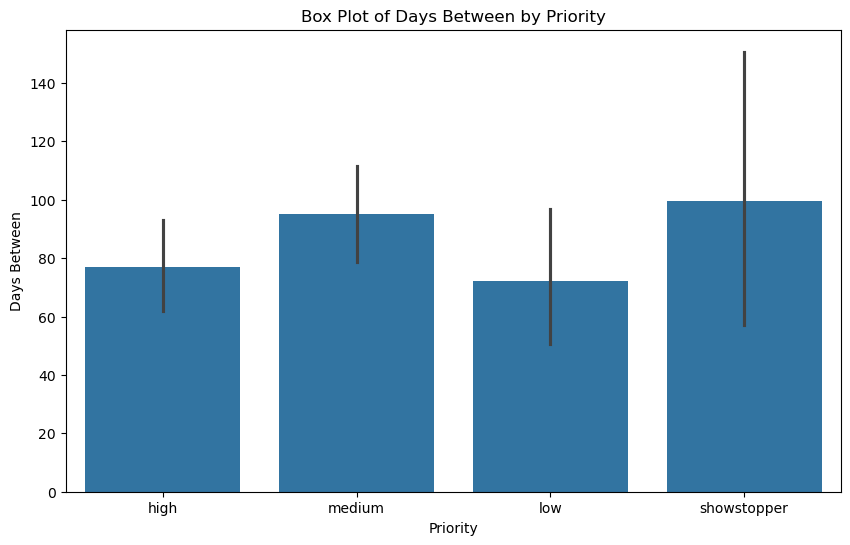

In [21]:
import matplotlib.pyplot as plt

import seaborn as sns


plt.figure(figsize=(10, 6))
sns.barplot(x='priority', y='days_between', data=emr_data1)
plt.xlabel('Priority')
plt.ylabel('Days Between')
plt.title('Box Plot of Days Between by Priority')
plt.show()



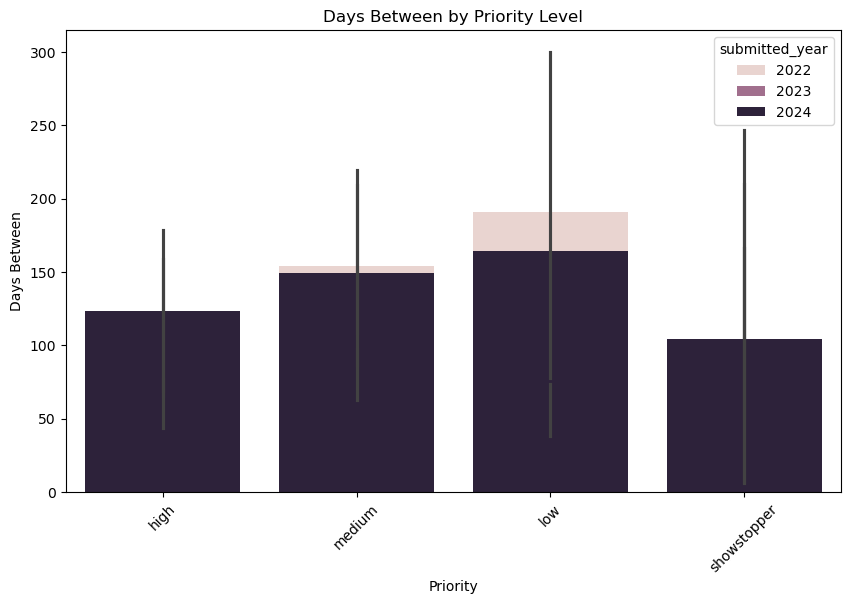

In [22]:
#import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=emr_data1, x='priority', y='days_between', hue='submitted_year', dodge=False)
plt.title('Days Between by Priority Level')
plt.ylabel('Days Between')
plt.xlabel('Priority')
plt.xticks(rotation=45)
plt.show()


In [5]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'days_between'
Q1 = emr_data1['days_between'].quantile(0.25)
Q3 = emr_data1['days_between'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter to get outliers (values below the lower bound or above the upper bound)
outliers = emr_data1[(emr_data1['days_between'] < lower_bound) | (emr_data1['days_between'] > upper_bound)]


outliers_table = outliers[['title','priority','days_between','submitted_year']]
outliers_table.sort_values(by='days_between', ascending=False)



,title,priority,days_between,submitted_year
171,[EMR][CXL][MCC]Post moka shows MCA_IAL_TX_RUN_...,medium,514,2023
306,[EMR][A1][CXL] reserved bits are set in H2D da...,medium,494,2023
183,[Cluster][MCC-XCC R1-A1] MCA_DISPATCHER_RUN_B...,medium,418,2023
310,[Cluster][XCC A1][MCA_WATCHDOG_TIMEOUT_BULK_CR...,medium,378,2023
77,[EMR][XCC][A1] EMR PPV - DRG Sanity MUC Failin...,medium,371,2023
86,[EMR XCC] Prod POF enablement: S3M is not resp...,high,361,2022
368,[Bytedance][Yichun][Nettrix] NVMe PCIe speed d...,high,356,2023
198,[EMR-PO][A0][RAS]: CHA mc_status & UBOX mc_mis...,medium,354,2022
88,EMR PO: Errata update - MSR for DDIO Mask won...,low,354,2022
126,[EMR XCC A0 PO][PC6] DMI not reporting idle an...,medium,346,2022


In [6]:
print(IQR) ### it's used to identify the spread of the central portion of the data,captures the middle 50%.
print(lower_bound) 
print(upper_bound) ### Any data points with values above this threshold are considered outliers.

109.0
-150.5
285.5


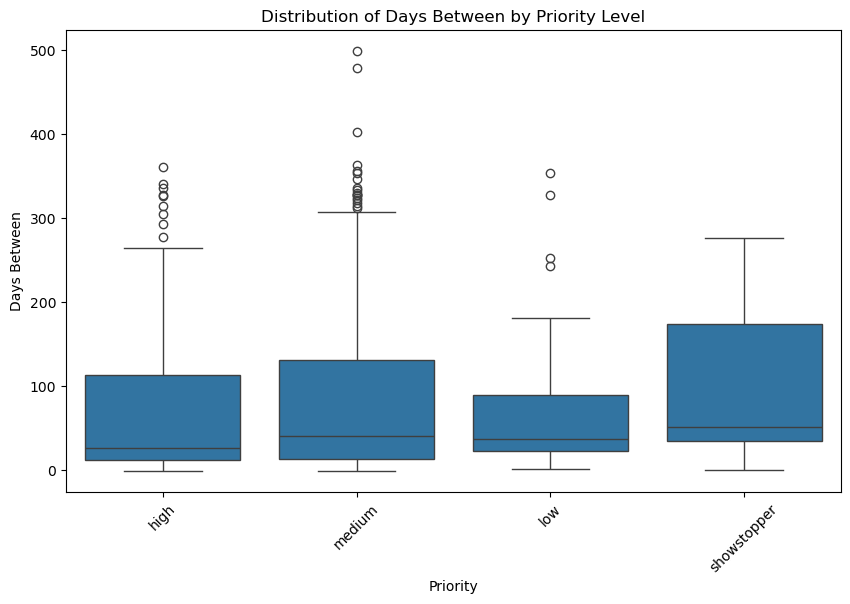

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=emr_data1, x='priority', y='days_between')
plt.title('Distribution of Days Between by Priority Level')
plt.ylabel('Days Between')
plt.xlabel('Priority')
plt.xticks(rotation=45)
plt.show()


In [20]:
fd=emr_data1[emr_data1['days_between'] >= 281.75]
fd

,id,updated_date,component,family,release,priority,title,status_reason,submitted_date,closed_date,owner,sighting.conclusion,sighting.team_found,priority_num,submitted_year,days_between
17,14018000504,9/10/2023 23:39,hw.fuse,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR XCC] Wrong mapping on SST-TF mailbox for ...,complete_validated,2022-11-17 02:51:00,2023-10-09 23:39:00.000000,coramire,hw.bug,sv.enabling,2,2022,326
18,14018000516,10/10/2023 21:53,hw.fuse,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR XCC] Wrong Turbo Bin bucket 7 impacting P...,complete_validated,2022-11-17 03:02:00,2023-10-10 21:53:00.000000,coramire,hw.bug,sv.enabling,3,2022,327
23,14018183474,10/10/2023 20:11,hw.fuse,Emerald Rapids-SP-MCC Die,emrsp_mcc_r0,high,[EMR MCC] Wrong mapping on SST-TF mailbox for ...,complete_validated,2022-12-09 18:16:00,2023-10-10 20:11:00.000000,coramire,hw.bug,sv.enabling,2,2022,305
76,14020089463,19/06/2024 04:14,fw.ltm,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[EMR][EMR_A1_SVOS_VV][PECI] pecirand return 0x...,rejected_cannot_reproduce,2023-08-11 20:12:00,2024-06-19 04:14:00.000000,cadoming,no_root_cause.rejected,sv,3,2023,312
77,14020784944,21/05/2024 23:37,hw.big_core,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[EMR][XCC][A1] EMR PPV - DRG Sanity MUC Failin...,root_caused_pursuing_fix,2023-11-06 16:50:00,2024-10-31 10:22:41.334856,bcalhoon,hw.tuning,mfg.ppv,3,2023,359
78,15014859759,3/2/2024 14:45,fw.other,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[Cluster][EMR][XCC][A1][BKC24] SPECCPU povray ...,root_caused_awaiting_fix,2023-12-11 01:22:00,2024-10-31 10:22:41.334856,bushengw,fw.bug,bu_platform,3,2023,325
86,14017745683,10/10/2023 20:10,val.env.configuration,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR XCC] Prod POF enablement: S3M is not resp...,complete_validated,2022-10-13 21:50:00,2023-10-10 20:10:00.000000,dramosol,env.bug,sv.enabling,2,2022,361
88,14017804101,10/10/2023 23:00,fw.ucode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,low,EMR PO: Errata update - MSR for DDIO Mask won...,complete_wont_validate,2022-10-21 17:54:00,2023-10-10 23:00:00.000000,dvalgano,hw.bug,sv.execution,4,2022,354
91,14018006530,10/10/2023 21:54,val.env.configuration,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR][PTV] System early Cattrip On 385W EMR P...,complete_validated,2022-11-17 17:58:00,2023-10-10 21:54:00.000000,gomeseva,env.bug,sv.enabling,3,2022,327
126,14017859773,10/10/2023 21:51,hw.dmi,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR XCC A0 PO][PC6] DMI not reporting idle an...,complete_validated,2022-10-29 00:41:00,2023-10-10 21:50:00.000000,hmpicosm,hw.bug,sv.enabling,3,2022,346


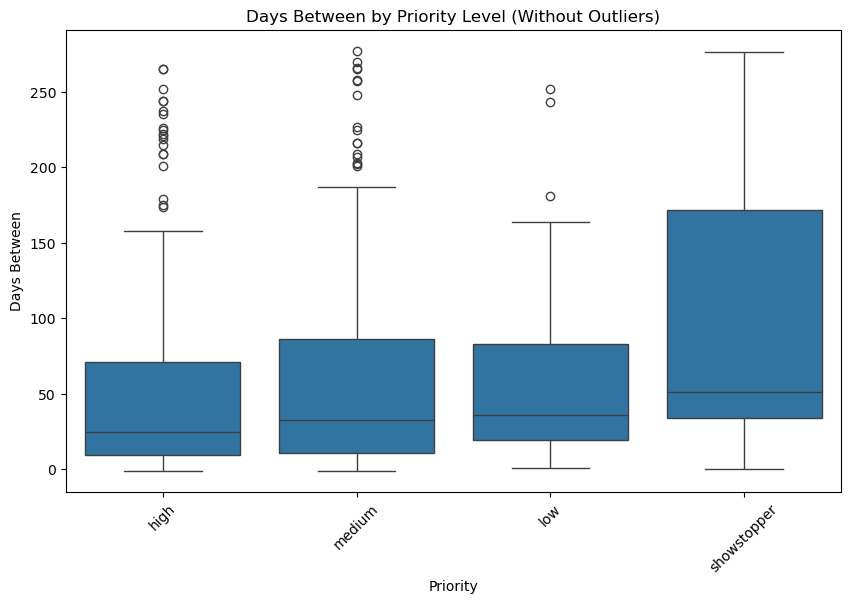

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=fd, x='priority', y='days_between')
plt.title('Days Between by Priority Level (Without Outliers)')
plt.ylabel('Days Between')
plt.xlabel('Priority')
plt.xticks(rotation=45)
plt.show()


In [15]:
#### QTY BY DAYS AND PRIORITY (TOTAL=353)

emr_data1[["days_between","priority"]].groupby("priority").count()

,days_between
priority,
high,129
low,46
medium,163
showstopper,15


In [6]:

#### QTY BY YEAR, PRIORITY (TOTAL=372)

emr_data1.groupby(["submitted_year"])["priority"].value_counts()


submitted_year  priority   
2022            high            30
                medium          30
                showstopper      9
                low              5
2023            medium         137
                high            94
                low             40
                showstopper      4
2024            high            11
                medium           8
                showstopper      3
                low              1
Name: count, dtype: int64

In [12]:
emr_data1.groupby(["submitted_year"])["status_reason"].value_counts()


submitted_year  status_reason            
2022            complete_validated           46
                rejected_not_a_defect        14
                complete                      4
                rejected_merged               4
                complete_wont_validate        3
                rejected_filed_by_mistake     2
                rejected_wont_do              1
2023            rejected_not_a_defect        98
                complete_validated           68
                rejected_merged              29
                rejected_wont_do             24
                complete_wont_validate       17
                complete                     13
                rejected_filed_by_mistake    12
                rejected_cannot_reproduce     5
                root_caused_awaiting_fix      4
                root_caused_pursuing_fix      4
                open_clone                    1
2024            root_caused_pursuing_fix      6
                rejected_not_a_defect         

In [36]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Download stopwords and punkt if you haven't already
nltk.download('punkt')
nltk.download('stopwords')

def process_by_word_frequency(emr_data1):
    # Set of stopwords
    stop_words = set(stopwords.words('english'))
    
    # Tokenize titles and remove stopwords
    emr_data1['title_tokens'] = emr_data1['title'].apply(lambda title: [
        word for word in word_tokenize(title.lower()) if word.isalnum() and word not in stop_words
    ])
    
    # Flatten the list of all words in the 'title' column to compute frequencies
    all_words = [word for tokens in emr_data1['title_tokens'] for word in tokens]
    
    # Compute word frequency distribution
    freq_dist = FreqDist(all_words)
    
    # Assign the most frequent words in each title to a new column
    emr_data1['frequent_words'] = emr_data1['title_tokens'].apply(lambda tokens: [
        word for word in tokens if freq_dist[word] > 1  # Threshold of 1, you can adjust
    ])
    
    return emr_data1

# Apply the function to your dataset
emr_data1 = process_by_word_frequency(emr_data1)

# Show the results
emr_nlp=emr_data1[['title', 'frequent_words']].head(20)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oscarahe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oscarahe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
emr_nlp

,title,frequent_words
0,[EMR] EMR system Throttles due to External pr...,"[emr, emr, system, due, external, 2, sockets]"
1,[EMR-CXL1.1][CXL][2S] BIOS needs to change Mod...,"[cxl, 2s, bios, needs, change, mode, all2all]"
2,[XPV AVE] [EMR XCC A0] [UPI GEN5 SIV] Rx JTOL ...,"[xpv, ave, emr, xcc, a0, upi, gen5, siv, rx, j..."
3,[XPV AVE] [EMR XCC A0] [UPI GEN5 SIV] Rx JTOL ...,"[xpv, ave, emr, xcc, a0, upi, gen5, siv, rx, j..."
4,[EMR XCC ES2]Request sighting report for track...,"[emr, xcc, es2, request, report, pirom, size, ..."
5,[EMR XCC ES2]PIROM size display issue on EMR E...,"[emr, xcc, es2, pirom, size, display, issue, e..."
6,[EMR] Host CA Training Complex Training Failu...,"[emr, host, ca, training, complex, training, f..."
7,[EMR] High TX DFE TAP Variability across multi...,"[emr, high, tx, dfe, variability, across, mult..."
8,[EMR][A1][PNP]Core Freq in powersave mode runn...,"[emr, a1, core, freq, powersave, mode, running..."
9,[EMR] Active Idle Mode violates MAX_RATIO from...,"[emr, active, idle, mode, violates, msr]"


In [38]:
emr_nlp['title'].sort_values()

14    EMR PO: Core and LLC slice masks are different...
11    EMR-XCC: FIVR Ouput voltage saturates at highe...
15               MDF Partify failure on  instance mdfv4
12      PI5 pcode_sa fuse disable incorrectly programed
16    [EMR A0][PO][Coherency] IDI_Stress with TOR an...
5     [EMR XCC ES2]PIROM size display issue on EMR E...
4     [EMR XCC ES2]Request sighting report for track...
10    [EMR XCC] S3M Fuse Offload failing due to mism...
18    [EMR XCC] Wrong Turbo Bin bucket 7 impacting P...
17    [EMR XCC] Wrong mapping on SST-TF mailbox for ...
19    [EMR XCC] wrong pcode_config_tdp_level_en_mask...
1     [EMR-CXL1.1][CXL][2S] BIOS needs to change Mod...
6     [EMR]  Host CA Training Complex Training Failu...
9     [EMR] Active Idle Mode violates MAX_RATIO from...
0     [EMR] EMR system  Throttles due to External pr...
7     [EMR] High TX DFE TAP Variability across multi...
8     [EMR][A1][PNP]Core Freq in powersave mode runn...
3     [XPV AVE] [EMR XCC A0] [UPI GEN5 SIV] Rx J

In [8]:
import spacy
nlp = spacy.load("en_core_web_sm")

# Procesar cada texto en la columna del DataFrame
emr_data1['processed'] = emr_data1['sighting_central_root'].apply(lambda x: nlp(x))
print(emr_data1['processed'])

0      (Problem, resolved, after, re, -, flashing, th...
1                                                   (NA)
2                                                   (NA)
3                                                   (NA)
4                                                   (NA)
                             ...                        
367                                                 (NA)
368    (PI5, instance, number, difference, between, S...
369    (See, extensive, remarks, from, Carlos, Ramire...
370                                                 (NA)
371                                                 (NA)
Name: processed, Length: 372, dtype: object


In [9]:
# Extraer vectores
emr_data1['vector'] = emr_data1['processed'].apply(lambda doc: doc.vector)
print(emr_data1['vector'])

0      [0.22955519, 0.1588198, -0.1092936, 0.09100256...
1      [-1.0877132, -0.83572483, -0.39917293, -0.5237...
2      [-1.0877132, -0.83572483, -0.39917293, -0.5237...
3      [-1.0877132, -0.83572483, -0.39917293, -0.5237...
4      [-1.0877132, -0.83572483, -0.39917293, -0.5237...
                             ...                        
367    [-1.0877132, -0.83572483, -0.39917293, -0.5237...
368    [-0.070803896, -0.38669345, -0.092506334, -0.1...
369    [0.023113642, -0.36388603, 0.19317278, -0.1208...
370    [-1.0877132, -0.83572483, -0.39917293, -0.5237...
371    [-1.0877132, -0.83572483, -0.39917293, -0.5237...
Name: vector, Length: 372, dtype: object


In [10]:
# Verificar la forma de los vectores
print(emr_data1['vector'].apply(lambda x: x.shape))

0      (96,)
1      (96,)
2      (96,)
3      (96,)
4      (96,)
       ...  
367    (96,)
368    (96,)
369    (96,)
370    (96,)
371    (96,)
Name: vector, Length: 372, dtype: object


In [30]:
priority_data = emr_data1[['priority_num']]

In [11]:
# Perform K-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=0)
emr_data1['vector'] = kmeans.fit_predict(priority_data)

NameError: name 'priority_data' is not defined

In [114]:
# Count the number of sightings in each cluster
cluster_counts = emr_data1['vector'].value_counts().sort_index()

In [118]:
# Define cluster names based on the priority mapping
#inverse_priority_mapping = {v: k for k, v in vector.items()}
#cluster_names = [inverse_priority_mapping[i + 1] for i in cluster_counts.index]

NameError: name 'vector' is not defined

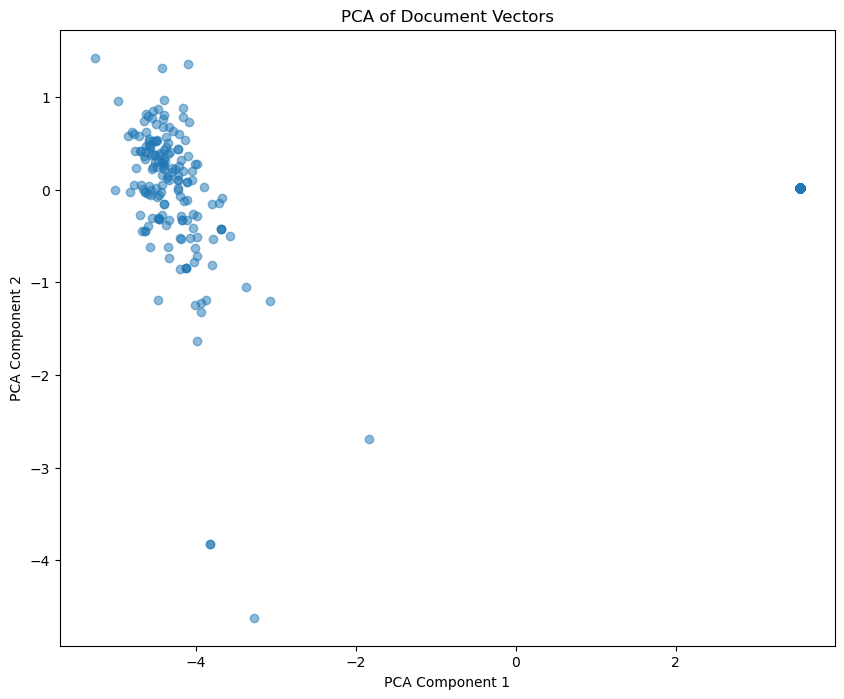

In [124]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(emr_data1['vector'].tolist())

# Plot the reduced vectors
plt.figure(figsize=(10, 8))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.5)
plt.title('PCA of Document Vectors')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


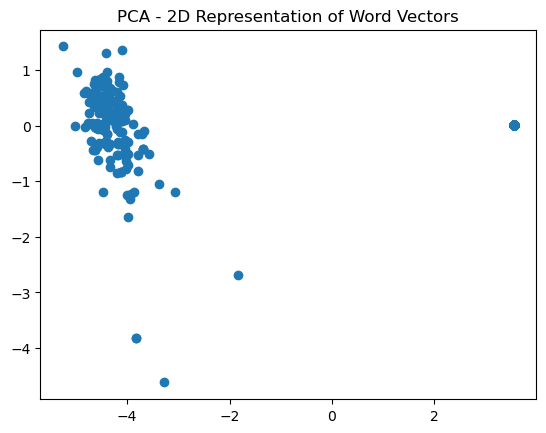

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D using PCA
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(emr_data1['vector'].tolist())

# Plot the 2D vectors
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])
plt.title('PCA - 2D Representation of Word Vectors')
plt.show()


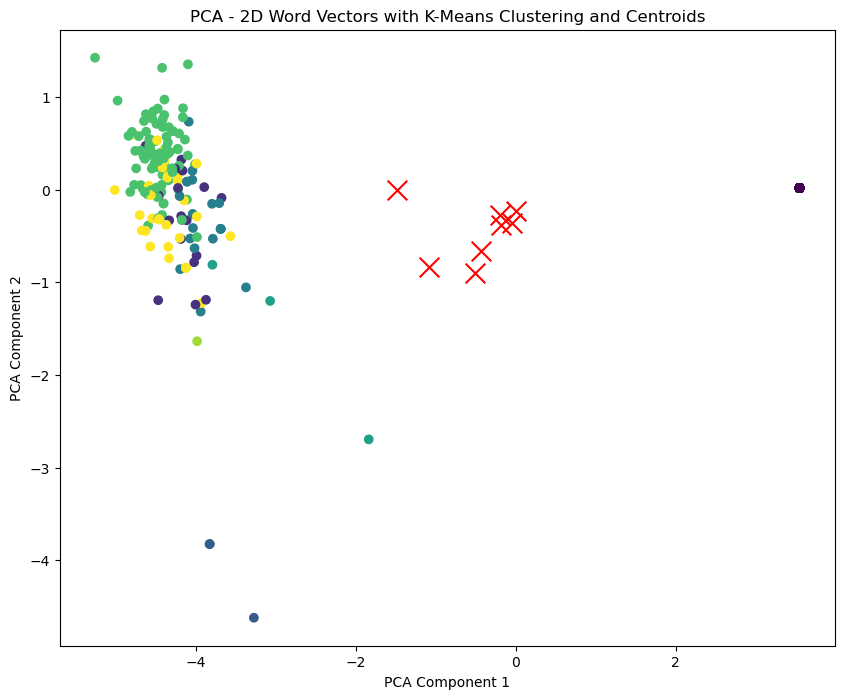

In [12]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(emr_data1['vector'].tolist())

# Apply K-Means clustering
kmeans = KMeans(n_clusters=8, random_state=42)
emr_data1['cluster'] = kmeans.fit_predict(emr_data1['vector'].tolist())
centers = kmeans.cluster_centers_

# Plot clusters with centroids
plt.figure(figsize=(10, 8))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=emr_data1['cluster'], cmap='viridis', marker='o')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200)
plt.title('PCA - 2D Word Vectors with K-Means Clustering and Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()



In [14]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(emr_data1['vector'].tolist(), emr_data1['cluster'])
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.5913869142532349


In [15]:
cluster_counts = emr_data1['cluster'].value_counts()
print(cluster_counts)


cluster
0    204
5     89
7     35
3     19
1     18
2      3
4      3
6      1
Name: count, dtype: int64


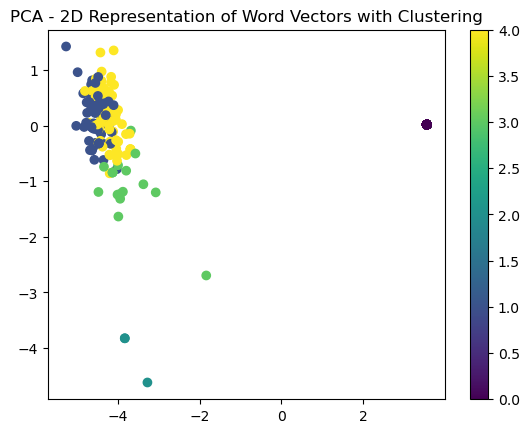

In [19]:
# Assuming you have cluster or label data in 'emr_data1['cluster']'
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c=emr_data1['cluster'], cmap='viridis')
plt.colorbar()
plt.title('PCA - 2D Representation of Word Vectors with Clustering')
plt.show()


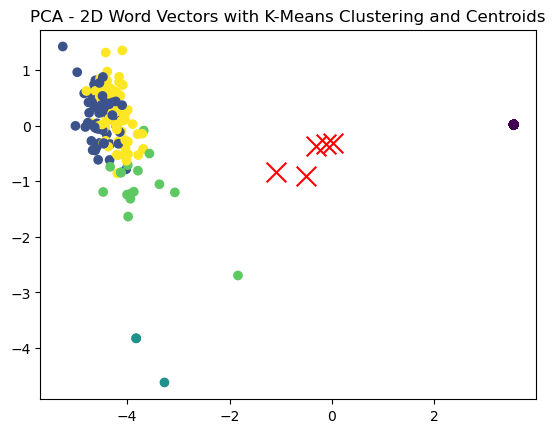

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
emr_data1['cluster'] = kmeans.fit_predict(emr_data1['vector'].tolist())
centers = kmeans.cluster_centers_

# Plot clusters with centroids
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c=emr_data1['cluster'], cmap='viridis', marker='o')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200)
plt.title('PCA - 2D Word Vectors with K-Means Clustering and Centroids')
plt.show()


In [137]:
# Calculate the mean of PCA_Component_1 and PCA_Component_2
centroid_pca1 = pca_df['PCA_Component_1'].mean()
centroid_pca2 = pca_df['PCA_Component_2'].mean()

print(f"Centroid of PCA Component 1: {centroid_pca1}")
print(f"Centroid of PCA Component 2: {centroid_pca2}")


Centroid of PCA Component 1: 6.87622002348484e-16
Centroid of PCA Component 2: -4.775152794086695e-18


In [21]:
import matplotlib.pyplot as plt

# Scatter plot for PCA components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA_Component_1'], pca_df['PCA_Component_2'], color='blue', label='PCA Components')

# Plot the centroid
plt.scatter(centroid_pca1, centroid_pca2, color='red', label='Centroid', s=200, edgecolor='black')

# Adding labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Scatter Plot of PCA Components with Centroid')
plt.legend()

plt.show()


NameError: name 'pca_df' is not defined

<Figure size 800x600 with 0 Axes>

In [22]:
import pandas as pd

# Create a DataFrame for PCA results
pca_df = pd.DataFrame({
    'Index': emr_data1.index,
    'Processed_Text': emr_data1['sighting_central_root'],  # or use original text column
    'PCA_Component_1': vectors_2d[:, 0],
    'PCA_Component_2': vectors_2d[:, 1]
})

# Display the first few rows of the table
print(pca_df.head())


   Index                                     Processed_Text  PCA_Component_1  \
0      0  Problem resolved after re-flashing the MAIN FP...        -4.625176   
1      1                                                 NA         3.548660   
2      2                                                 NA         3.548660   
3      3                                                 NA         3.548660   
4      4                                                 NA         3.548660   

   PCA_Component_2  
0         0.472554  
1         0.018490  
2         0.018490  
3         0.018490  
4         0.018490  


In [133]:
# Calculate min and max for PCA Component 1
pca1_min = pca_df['PCA_Component_1'].min()
pca1_max = pca_df['PCA_Component_1'].max()

# Calculate min and max for PCA Component 2
pca2_min = pca_df['PCA_Component_2'].min()
pca2_max = pca_df['PCA_Component_2'].max()

# Display the results
print("PCA Component 1 - Min:", pca1_min, "Max:", pca1_max)
print("PCA Component 2 - Min:", pca2_min, "Max:", pca2_max)


PCA Component 1 - Min: -5.2585933937736415 Max: 3.5486595992506653
PCA Component 2 - Min: -4.619380453122653 Max: 1.4230122381503354


In [135]:
pca_df[pca_df["PCA_Component_1"] ==3.5486595992506653 ]["Processed_Text"].values[0]

'NA'

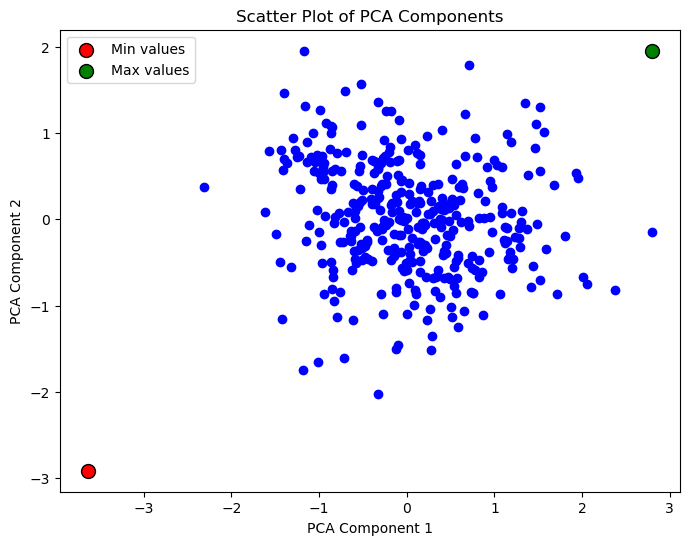

In [41]:
# Scatter plot for PCA components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA_Component_1'], pca_df['PCA_Component_2'], color='blue')

# Highlight the min and max points
plt.scatter(pca1_min, pca2_min, color='red', label='Min values', s=100, edgecolor='black')
plt.scatter(pca1_max, pca2_max, color='green', label='Max values', s=100, edgecolor='black')

# Adding labels
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Scatter Plot of PCA Components')
plt.legend()

plt.show()


In [67]:
import numpy as np

# Centroids (assuming you've already calculated them)
centroid_pca1 = pca_df['PCA_Component_1'].mean()
centroid_pca2 = pca_df['PCA_Component_2'].mean()

# Function to calculate the Euclidean distance from the centroids
def calculate_distance(row):
    return np.sqrt((row['PCA_Component_1'] - centroid_pca1)**2 + (row['PCA_Component_2'] - centroid_pca2)**2)

# Apply the function to each row in the DataFrame to calculate the distance to the centroid
pca_df['Distance_to_Centroid'] = pca_df.apply(calculate_distance, axis=1)

# Find the row with the minimum distance to the centroid (closest to the centroid)
closest_to_centroid = pca_df.loc[pca_df['Distance_to_Centroid'].idxmin()]

# Get the index of the closest title and retrieve the title from emr_data1
index_value = closest_to_centroid.name
title_closest_to_centroid = emr_data1.loc[index_value, 'title']

# Extract the PCA values for the closest point
closest_pca1 = closest_to_centroid['PCA_Component_1']
closest_pca2 = closest_to_centroid['PCA_Component_2']

print(f"The title closest to the centroid is: {title_closest_to_centroid}")
print(f"The PCA values for this title are: PCA_Component_1 = {closest_pca1}, PCA_Component_2 = {closest_pca2}")



The title closest to the centroid is: [ECC TF][Micron Bucket 1] RE32 fails at 5200 with UCECC
The PCA values for this title are: PCA_Component_1 = -0.001144058497944465, PCA_Component_2 = 0.016128334253113732


In [41]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=8, random_state=0)
emr_data1['cluster'] = kmeans.fit_predict(emr_data1['vector'].tolist())

# Display the cluster assignment with the title
new=print(emr_data1[['id','sighting_central_root', 'cluster']])
new=(emr_data1[['id','sighting_central_root', 'cluster']])
#new.to_csv("clusters.csv")

              id                              sighting_central_root  cluster
0    14018151333  Problem resolved after re-flashing the MAIN FP...        1
1    14018509356                                                 NA        0
2    14019055430                                                 NA        0
3    14019247088                                                 NA        0
4    15013435531                                                 NA        0
..           ...                                                ...      ...
367  15014600103                                                 NA        0
368  15014729895  PI5 instance number difference between SPR and...        3
369  16022750062  See extensive remarks from Carlos Ramirez More...        6
370  15014843377                                                 NA        0
371  15015659425                                                 NA        0

[372 rows x 3 columns]


In [43]:
new.to_csv('clusters.csv')

In [34]:
# Display titles in each cluster
for cluster_num in range(9):
    print(f"Cluster {cluster_num}:")
    cluster_titles = emr_data1[emr_data1['cluster'] == cluster_num]['sighting_central_root'].values
    for title in cluster_titles:
        print(f" - {title}")
    print("\n")


Cluster 0:
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA
 - NA

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(emr_data1['vector'].tolist(), emr_data1['days_between'], test_size=0.3, random_state=42)

# Train a logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Evaluate the model
print("Model accuracy: ", clf.score(X_test, y_test))


Model accuracy:  0.0625


In [14]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Evaluate the model
print("Model R^2 score: ", reg.score(X_test, y_test))


Model R^2 score:  -0.7886431217193604


In [31]:
from sklearn.ensemble import RandomForestRegressor

# Train a random forest regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Evaluate the model
print("Model R^2 score: ", rf.score(X_test, y_test))


Model R^2 score:  -0.0420700744608864


In [15]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between vectors
similarity_matrix = cosine_similarity(emr_data1['vector'].tolist())

# Display similarity matrix
print(similarity_matrix)


[[0.9999999  0.48714408 0.6706345  ... 0.60565263 0.5236038  0.6578199 ]
 [0.48714408 0.9999999  0.5594558  ... 0.67530334 0.51681894 0.5264227 ]
 [0.6706345  0.5594558  0.9999998  ... 0.7378689  0.5968982  0.7253362 ]
 ...
 [0.60565263 0.67530334 0.7378689  ... 1.0000002  0.5153497  0.63437253]
 [0.5236038  0.51681894 0.5968982  ... 0.5153497  0.99999994 0.6416299 ]
 [0.6578199  0.5264227  0.7253362  ... 0.63437253 0.6416299  1.        ]]


In [37]:
emr_data1[emr_data1["days_between"] == 0]["title"].values[0]

'[EMR-CXL1.1][CXL][2S] BIOS needs to change Mode to All2All when Heteromode is chosen'

In [38]:
emr_data1[emr_data1["days_between"] == 0]["title"].values

array(['[EMR-CXL1.1][CXL][2S] BIOS needs to change Mode to All2All when Heteromode is chosen',
       '[EMR XCC ES2]Request sighting report for tracking about the PIROM size display issue on EMR ES2 XCC/MCC (A0/R0).',
       '[EMR] Active Idle Mode violates MAX_RATIO from MSR 0x620',
       '[EMR_A0] PCU/Acode MCAs during OSPL and Cafe Ucode_update recipe',
       '[Cluster][EMR][XCC][A0][BKC13]MLC latency performance drop ~11.9% in BKC13 compare to BKC11',
       '[EMR][MCC][R1][SST-TF] virtual.pcode_runtime_fact_config_0_turbo_ratio_limit_ratios_cdyn_index4_ratio0',
       '[EMR][MCC][R1][SST-TF] virtual.pcode_runtime_fact_config_0_turbo_ratio_limit_ratios_cdyn_index4_ratio0',
       '[EMR A0][PO][Coherency][CXL] SUT hang on GM03WVAW2736 when executing Lock Stress + CXL',
       '[EMR MCC PO] 3DS 4Rx4 (2Hi) 1DPC test fails JedecIt check. Violation of -1',
       '[EMR] [RAS] Parity Errors Reported After SUT reset when Viral Alert enabled in Bios Menu (surprise warm reset after viral/

In [39]:
plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi'] = 80

In [46]:
sns.countplot(data=emr_data1, x='priority_num')
plt.title('Real or Not Real Disaster Tweet')

TypeError: Data source must be a DataFrame or Mapping, not <class 'numpy.ndarray'>.

C:\Users\oscarahe\AppData\Local\Temp\ipykernel_19184\2611431751.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priority_data['priority'] = priority_data['priority'].map(priority_mapping)


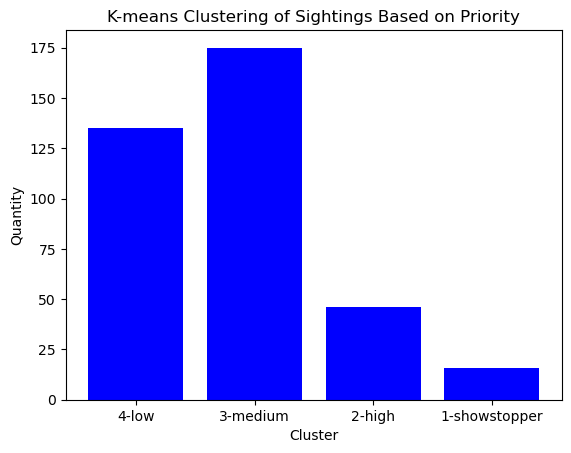

In [40]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data=pd.read_csv('C:/Users/oscarahe/OneDrive - Intel Corporation/Desktop/Exceles/EMR sightings dataset.csv')
data

# Extract the priority column
priority_data = data[['priority']]

# Convert priority to numerical values if necessary
priority_mapping = {'4-low': 1, '3-medium': 2, '2-high': 3, '1-showstopper': 4}
priority_data['priority'] = priority_data['priority'].map(priority_mapping)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
data['cluster'] = kmeans.fit_predict(priority_data)

# Count the number of sightings in each cluster
cluster_counts = data['cluster'].value_counts().sort_index()

# Define cluster names based on the priority mapping
inverse_priority_mapping = {v: k for k, v in priority_mapping.items()}
cluster_names = [inverse_priority_mapping[i + 1] for i in cluster_counts.index]

# Plot the clusters using a bar graph
plt.bar(cluster_counts.index, cluster_counts.values, color='blue')
plt.xlabel('Cluster')
plt.ylabel('Quantity')
plt.title('K-means Clustering of Sightings Based on Priority')
plt.xticks(cluster_counts.index, cluster_names)
plt.show()